# IS 445 - Final Project
# INDIVIDUAL

Some background. I have recently taken a machine learning class and there were many aspects of the course which required visualizations to function. Therefore, I utilized the same dataset repository they used for their homework demonstrations in this project. I also have nightmares cleaning data from poorly maintained CSV files from STAT 107, and the datasets on the UC Irvine Repo are well manicured and proven to function. These datasets are also used on the most widely available Python machine learning library, sklearn, which allowed me to import the dataset without the need to download it. While in the context of this project it may not be useful, this allows any code to run on the dataset even without a local copy of it.

## Dataset Information

Link: https://archive.ics.uci.edu/dataset/53/iris

Home Repo: https://archive.ics.uci.edu/

Python Library: https://scikit-learn.org/stable/



## Part 1: KNN Classification

### 1. Load the iris dataset and see what its basic information is:

In [53]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
Y = iris.target

n_samples = iris.target.shape[0]

print('Number of samples:', n_samples)
print('Input size:', X.shape)
print('Input feature names:', iris.feature_names)
print('Output size:', Y.shape)
print('Output classes:', iris.target_names)

Number of samples: 150
Input size: (150, 4)
Input feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Output size: (150,)
Output classes: ['setosa' 'versicolor' 'virginica']


We can see that there will be 150 variables each with 4 features and all being classified into 1 of 3 classes.

### 2. Train the ML models using the dataset.

First we split the dataset into 2 distinct parts, one for training the algorithm and one for testing the algorithms' accuracy. This method of verifying an algorithm's accuracy is called Cross-Validation.

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("Training sets:", X_train.shape, Y_train.shape)
print("Testing sets:", X_test.shape, Y_test.shape)

Training sets: (120, 4) (120,)
Testing sets: (30, 4) (30,)


### 3. Visualize the impact of various k-values on the algorithm's classification accuracy

Then we generate a chart which displays the overall accuracy of the algorithm depending on the hyperparameter, or k-value, of the KNN Classification method.

We achieve this by testing the algorithm on each k-value from 1 to 20, appending each accuracy score to an array using a for loop, and generating a plot from the array.

k: 1 	Accuracy: 0.9416666666666667
k: 2 	Accuracy: 0.925
k: 3 	Accuracy: 0.925
k: 4 	Accuracy: 0.925
k: 5 	Accuracy: 0.9333333333333333
k: 6 	Accuracy: 0.9416666666666668
k: 7 	Accuracy: 0.95
k: 8 	Accuracy: 0.9583333333333334
k: 9 	Accuracy: 0.9583333333333334
k: 10 	Accuracy: 0.95
k: 11 	Accuracy: 0.9583333333333334
k: 12 	Accuracy: 0.9666666666666668
k: 13 	Accuracy: 0.9583333333333334
k: 14 	Accuracy: 0.9666666666666668
k: 15 	Accuracy: 0.9583333333333334
k: 16 	Accuracy: 0.9583333333333334
k: 17 	Accuracy: 0.9416666666666668
k: 18 	Accuracy: 0.9416666666666668
k: 19 	Accuracy: 0.9416666666666668


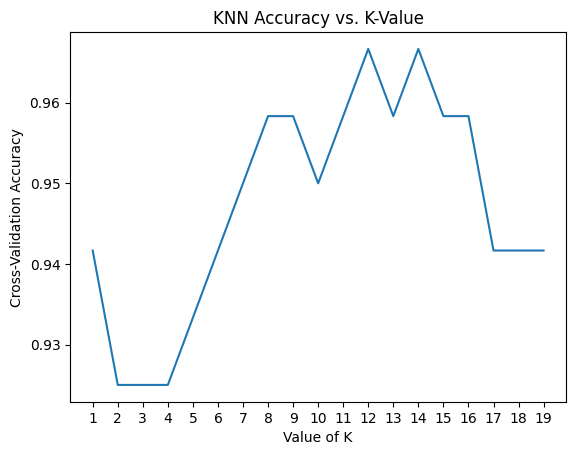

In [55]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

k_range = np.arange(1, 20)

cross_validation_acc = []

for n_neighbors in (k_range):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, Y_train)

    # test / predict
    y_new = knn.predict(X_test)

    accuracy = np.mean(cross_val_score(knn, X_train, Y_train))
    print("k:", n_neighbors, "\tAccuracy:", accuracy)
    cross_validation_acc.append(accuracy)

plt.plot(k_range, cross_validation_acc)
plt.xticks(k_range)
plt.title('KNN Accuracy vs. K-Value')
plt.xlabel('Value of K')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [56]:
print("Lowest k-value with the highest accuracy:\n", cross_validation_acc.index(max(cross_validation_acc)) + 1)

Lowest k-value with the highest accuracy:
 12


Here we see tha the value of 12 for the k-value will result in the highest overall accuracy of the KNN Classifier method.

## Part 2: Gradient-Descent and Linear Regression

### 1. Scale the original dataset:

These ML models, gradient descent and linear regression, are sensitive to data scaling, basically the range of values the data can inhabit. To control this, we rescale all input features to a range of [-1, 1].

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 2. Training the gradient descent based linear regression

In [58]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor()
sgdr.fit(X_train, Y_train)
y_pred = sgdr.predict(X_test)

### 3. Visualize different learning-rate(lr)-values during cross-validation

We generate a  similar chart of the accuracy for the Gradient-Descent based Linear Regression method based on its LR-value.

We achieve this by testing the algorithm on each lr-value from 0.01 to 0.00001 as these give an inclusive picture, appending each accuracy score to an array using a for loop, and generating a plot from the array.

lr: 0.01 	Accuracy: 0.9017046158324227
Cross Validation Score: [0.90172685 0.81943114 0.95373803 0.94235302 0.88999163]
lr: 0.003 	Accuracy: 0.8672227109725199
Cross Validation Score: [0.86957038 0.74126834 0.91255926 0.92792176 0.88178554]
lr: 0.001 	Accuracy: 0.7491160167844944
Cross Validation Score: [0.72248401 0.55598877 0.80487283 0.86856169 0.79294203]
lr: 0.0003 	Accuracy: 0.34461314585603964
Cross Validation Score: [0.1723032  0.02835084 0.49110514 0.6540984  0.37846971]
lr: 0.0001 	Accuracy: -0.4706033475133843
Cross Validation Score: [-0.96444811 -0.836044   -0.12808     0.12153461 -0.54613912]
lr: 1e-05 	Accuracy: -1.7164690257382733
Cross Validation Score: [-2.49377827 -2.06385981 -1.08047737 -0.94966249 -1.99402866]


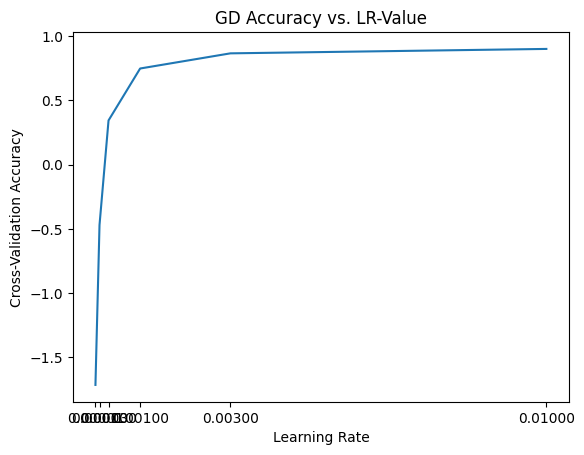

In [59]:
lr_range = np.array([0.01, 0.003, 0.001, 3e-4, 1e-4, 1e-5])

cross_validation_acc = []

for lr in (lr_range):
    sgdr = SGDRegressor(eta0=lr)
    sgdr.fit(X_train, Y_train)

    y_pred = sgdr.predict(X_test)

    accuracy = np.mean(cross_val_score(sgdr, X_train, Y_train, scoring='r2'))
    print("lr:", lr, "\tAccuracy:", accuracy)
    print("Cross Validation Score:", cross_val_score(sgdr, X_train, Y_train))
    cross_validation_acc.append(accuracy)

plt.plot(lr_range, cross_validation_acc)
plt.xticks(lr_range)
plt.title('GD Accuracy vs. LR-Value')
plt.xlabel('Learning Rate')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [60]:
print("0.003 Accuracy vs. 0.01 Accuracy:\n", (1 - (cross_validation_acc[0] - cross_validation_acc[1])) * 100, "%")

0.003 Accuracy vs. 0.01 Accuracy:
 96.55180951400972 %


We see that the best lr-value for this method is 0.03 as it maintains sufficiently high accuracy while having the quickest learning rate.